## フェスパワー分布を求める

In [6]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from packages.japanize import japanize
import packages.db as db
import packages.i18n as i18n
import packages.definitions as d
import packages.utils as u

locale = i18n.Locale.JA
date_from = dt.date(2023, 4, 1)
date_to = dt.date(2023, 4, 30)
battles = db.load_battles(lobby=d.Lobby.SPLATFEST_CHALLENGE, date_from=date_from, date_to=date_to)
battles["mode"].value_counts()

nawabari    9673
Name: mode, dtype: int64

In [7]:
power_agg = battles["power"].describe()
power_agg

count    7753.000000
mean     1783.401380
std       316.087001
min       694.200000
25%      1576.800000
50%      1779.900000
75%      1975.300000
max      2656.500000
Name: power, dtype: float64

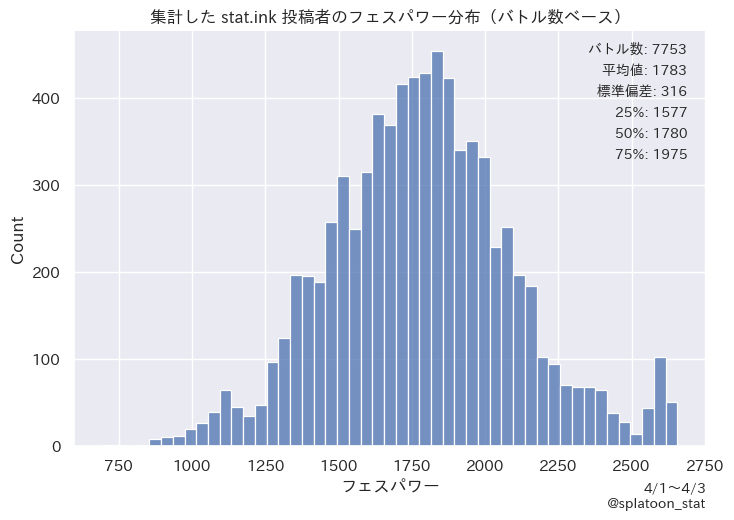

In [8]:
sns.set_theme()
japanize()

translations = i18n.get_translations(custom_translation_df=pd.DataFrame([
    { "key": "title", "name-ja": "集計した stat.ink 投稿者のフェスパワー分布（バトル数ベース）", "name-en": "Splatfest power distribution of stat.ink users (based on number of battles)" },
    { "key": "power", "name-ja": "フェスパワー", "name-en": "Splatfest power" },
    { "key": "battle_num", "name-ja": "バトル数", "name-en": "Number of battles" },
    { "key": "mean", "name-ja": "平均値", "name-en": "Average" },
    { "key": "sd", "name-ja": "標準偏差", "name-en": "Standard deviation" },
]), locale=locale)

g = sns.displot(
    data=battles,
    x="power",
    height=5,
    aspect=1.5,
)
ax = g.ax
ax.set(
    title=translations["title"],
    xlabel=translations["power"],
)
ax.text(
    0.97,
    0.97,
    f"{translations['battle_num']}: {round(power_agg.loc['count'])}\n{translations['mean']}: {round(power_agg.loc['mean'])}\n{translations['sd']}: {round(power_agg.loc['std'])}\n25%: {round(power_agg.loc['25%'])}\n50%: {round(power_agg.loc['50%'])}\n75%: {round(power_agg.loc['75%'])}",
    ha="right",
    va="top",
    fontsize=10,
    linespacing=1.8,
    transform=ax.transAxes,
)
u.credit(g.ax, g.fig, i18n.battles_to_duration_str(battles, locale))
plt.show()